In [1]:
import tsampling
from tsampling.bernoulli import BernoulliExperiment
from tsampling.priors import BetaPrior
from pandas import Series
from tsampling.poisson import PoissonExperiment
from tsampling.priors import GammaPrior

## Bernoulli Experiment

In [2]:
means = Series([0.5, 0.7, 0.6])
variances = Series([0.1, 0.15, 0.23])
effective_sizes = Series([3, 20, 10])
labels = Series(["choice1", "choice2", "choice3"])

In [3]:
pr = BetaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'choice1': {'a': 2, 'b': 2},
 'choice2': {'a': 14, 'b': 6},
 'choice3': {'a': 6, 'b': 4}}

In [4]:
experiment = BernoulliExperiment(priors = pr)

In [5]:
experiment.choose_arm()

'choice2'

In [6]:
experiment.choose_arm()

'choice2'

In [7]:
experiment.get_distribution(size = 5000) # size is the number of values to simulate for the distributions

[{'Label': 'choice1',
  'Percentage - Success': 0.5032,
  'Percentage - Fail': 0.4968},
 {'Label': 'choice2',
  'Percentage - Success': 0.6968,
  'Percentage - Fail': 0.3032},
 {'Label': 'choice3',
  'Percentage - Success': 0.605,
  'Percentage - Fail': 0.395}]

In [8]:
rewards = [{"label":"choice1", "reward":1},{"label":"choice2", "reward":0},{"label":"choice2", "reward":0}]
experiment.add_rewards(rewards)

In [9]:
experiment.get_distribution(size=5000)

[{'Label': 'choice1',
  'Percentage - Success': 0.6072,
  'Percentage - Fail': 0.3928},
 {'Label': 'choice2',
  'Percentage - Success': 0.6434,
  'Percentage - Fail': 0.3566},
 {'Label': 'choice3',
  'Percentage - Success': 0.6122,
  'Percentage - Fail': 0.3878}]

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/tsampling/root.py:142: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim_array, hist=False, label=key)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/tsampling/root.py:142: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

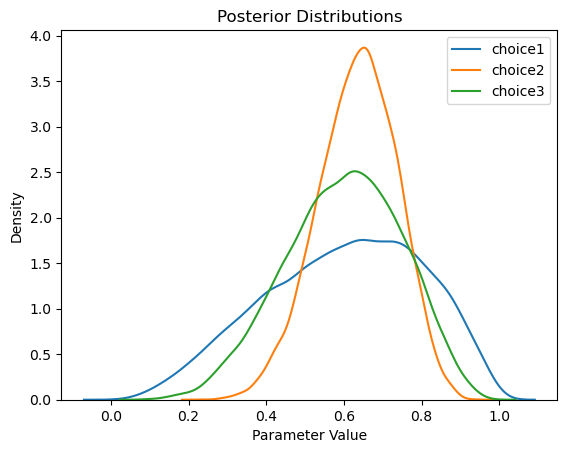

In [10]:
experiment.plot_posterior()

## Poisson Distribution

In [11]:
means = Series([100, 110, 75])
variances = Series([75, 200, None])
effective_sizes = Series([None, None, 3])
labels = Series(["option1", "option2", "option3"])

In [12]:
pr = GammaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'option1': {'shape': 133.333, 'scale': 0.75},
 'option2': {'shape': 60.5, 'scale': 1.818},
 'option3': {'shape': 225.0, 'scale': 0.333}}

In [13]:
experiment = PoissonExperiment(priors = pr)

In [14]:
experiment.choose_arm()

'option2'

In [15]:
experiment.choose_arm()

'option2'

In [16]:
experiment.get_distribution(size = 5000)# size is the number of values to simulate for the distributions

[{'Label': 'option1', '95% Credible Interval': (75.0, 127.0), 'mean': 100.126},
 {'Label': 'option2', '95% Credible Interval': (79.0, 148.0), 'mean': 110.21},
 {'Label': 'option3', '95% Credible Interval': (56.0, 95.0), 'mean': 74.731}]

In [17]:
rewards = [{"label":"option1", "reward":150},{"label":"option2", "reward":30},{"label":"option3", "reward":10}]
experiment.add_rewards(rewards)

In [18]:
experiment.get_distribution(size=5000)

[{'Label': 'option1', '95% Credible Interval': (97.0, 148.0), 'mean': 121.68},
 {'Label': 'option2', '95% Credible Interval': (40.0, 79.0), 'mean': 58.542},
 {'Label': 'option3', '95% Credible Interval': (42.0, 76.0), 'mean': 58.644}]

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/tsampling/root.py:142: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim_array, hist=False, label=key)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/tsampling/root.py:142: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

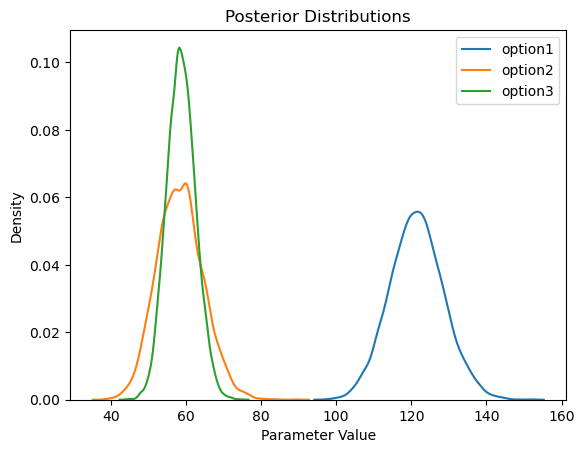

In [19]:
experiment.plot_posterior()